In [1]:
import tweepy
import json
import pandas as pd
import numpy as np
import re

In [2]:
candidates = ['alvarodias_', 'cirogomes', 'guilhermeboulos', 'jairbolsonaro', 'geraldoalckmin',
              'marinasilva', 'lulaoficial', 'meirelles', 'joaoamoedonovo', 'verapstu', 'Eymaeloficial']

In [3]:
# Authentification
with open('tokens.json') as f:
    tokens = json.load(f)
    
auth = tweepy.OAuthHandler(tokens["consumer_key"], tokens["consumer_secret"])
auth.set_access_token(tokens["access_token"], tokens["access_token_secret"])

api = tweepy.API(auth)

In [4]:
def get_latest_tweets(cand, count=500):
    result = api.user_timeline(id = api.get_user(cand).id, count = count, tweet_mode='extended')
    tweets = [r.full_text for r in result]
    return tweets

In [5]:
# get tweets
tweets = {}
for cand in candidates:
    user = api.get_user(cand)
    print(user.screen_name, user.followers_count)
    tweets[cand] = get_latest_tweets(cand)

alvarodias_ 355802
cirogomes 216575
GuilhermeBoulos 108603
jairbolsonaro 1315084
geraldoalckmin 975870
MarinaSilva 1884370
LulaOficial 411306
meirelles 57482
joaoamoedonovo 153231
verapstu 669
Eymaeloficial 22611


In [6]:
import wordcloud as wc
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

pt_stops = set(stopwords.words('portuguese'))
others = ['presidente', 'candidato', 'brasil', 'país', 'proposta', 'política', 'https', 'ciro', 'alvaro', 'dias', 'lula', 'marina', 'silva', 'gomes', 'boulos', 'amoedo', 'meirelles', 'geraldo', 'alckmin', 'jair', 'bolsonaro']

def remove_unwanted(t):
    return [word for word in t.split() if not any(other in word for other in others) and word not in pt_stops]


In [7]:
# check if candidates have the same number of tweets
for cand in candidates:
    if len(tweets[cand]) == 200:
        tweets[cand] = tweets[cand][:-1]
    print(len(tweets[cand]))


199
199
199
199
199
199
199
199
199
199
199


In [9]:
df = pd.DataFrame.from_dict(tweets)
# remove puntuacoes, remove letras maiusculas
df = df.applymap(lambda x: re.sub('[,\.!?]', '', x)).applymap(str.lower)
# remove hyperlinks e stop_words
df = df.applymap(remove_unwanted).applymap(lambda l: " ".join(l))


print(df.head())
# print(df['tweet_processed'])



                                         alvarodias_  \
0  caminhada cidades mineiras ipatinga teófilo pa...   
1  rt @g1: álvaro faz campanha vale aço diz polít...   
2  rt @norteagroto: veja vídeo: presidenciáveis c...   
3  @rafael03267877 decepcionei voto fachin existe...   
4  @miriammadoenho @cjunioraf1 @augustosnunes obv...   

                                           cirogomes  \
0  ideia é usar modelos deu certo outros criar si...   
1  temas preocupa categoria é aposentadoria progr...   
2  conversou líderes sindicais sobre principais r...   
3  encontrou manhã trabalhadores dirigentes lider...   
4  63 milhões pessoas nessa situação sabe fazer l...   

                                     guilhermeboulos  \
0  economista-chefe xp investimentos diz seguir "...   
1  livro cabeceira vice é sobre americano lutou e...   
2  governo temer diminui índice investimentos púb...   
3  ontem incrível comício norte obrigado belém #diab   
4  é acionou justiça retirar conteúdo internet

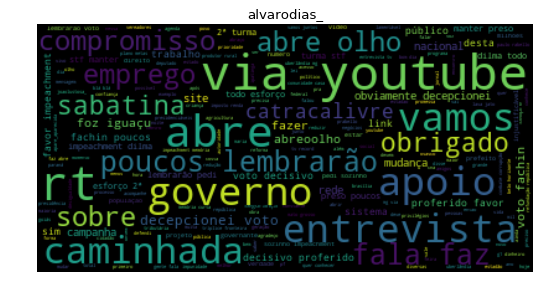

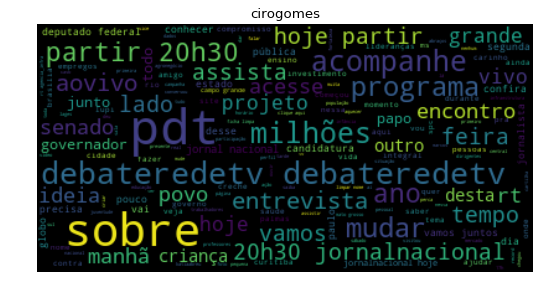

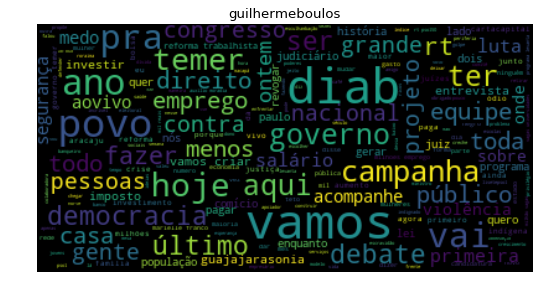

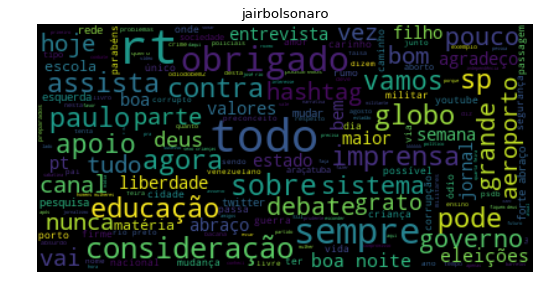

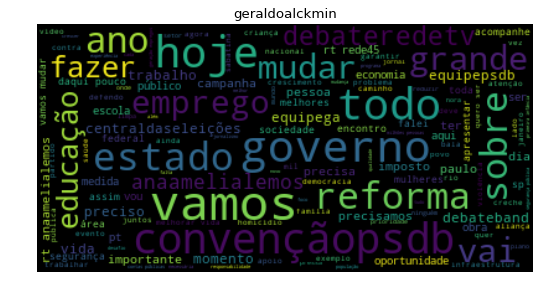

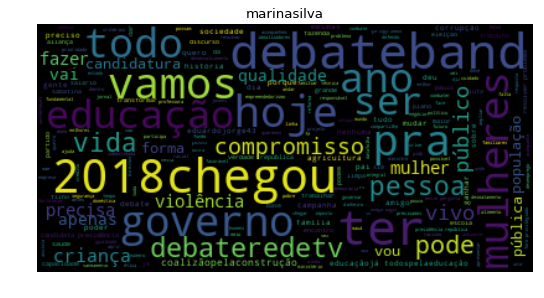

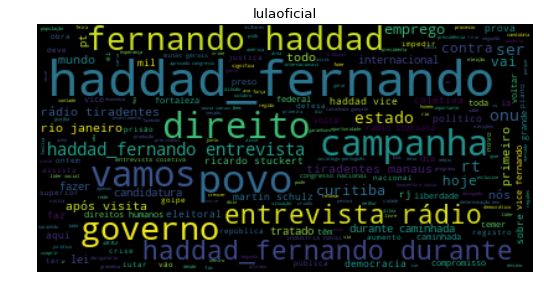

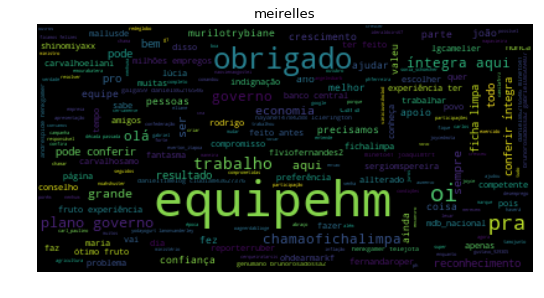

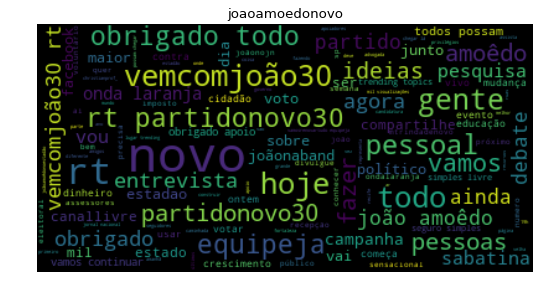

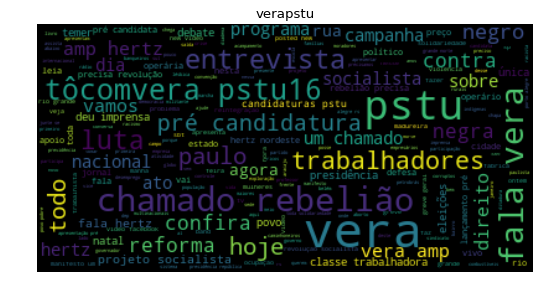

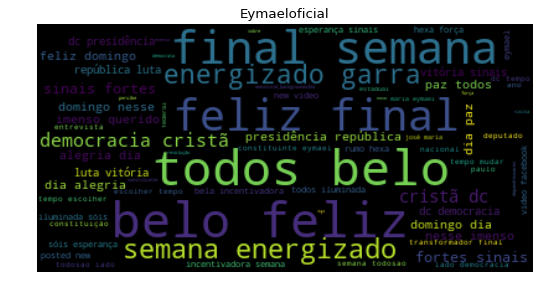

In [11]:
import matplotlib.pyplot as plt

    
for index, cand in enumerate(df):
    long = ' '.join(df[cand])
    wordcloud = wc.WordCloud(max_font_size=40)
    wordcloud.generate(long)
    figure = plt.figure(num=index, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.title(cand)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")







In [ ]:
import collections
ordered = {}
for index, cand in enumerate(df):
    long = ' '.join(df[cand])
    wordcloud = wc.WordCloud(max_font_size=40)
    wordcloud.generate(long)
    ordered[cand] = collections.OrderedDict(sorted(wordcloud.words_.items(), key=lambda x: x[1], reverse=True))
    print(cand, ordered[cand])